In [3]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile, assemble
from qiskit.visualization import plot_histogram

In [4]:
from qiskit_textbook.widgets import bv_widget
bv_widget(3, "011", hide_oracle=False)

HTMLMath(value='$$ |000\\rangle = |000\\rangle $$')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\xce\x00\x00\x01\x08\x08\x06\x00\x00\x00\x17\xd9\…

1.上記のベルンシュタイン・ヴァジラニの実装は、秘密のビット文字列 s=011 の場合のものです。  
秘密の文字列 s=1011 の場合を実装してください。  
結果は期待通りでしたか？説明してみてください。  

In [5]:
from qiskit_textbook.widgets import bv_widget
bv_widget(4, "1011", hide_oracle=False)

HTMLMath(value='$$ |0000\\rangle = |0000\\rangle $$')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\xce\x00\x00\x01E\x08\x06\x00\x00\x00\xa4\x1f\xd2…

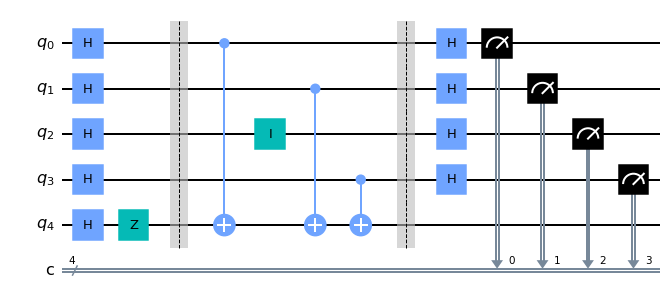

In [6]:
n = 4 # 文字列sの量子ビット数
s = '1011'   # 秘密文字列s

# n量子ビットおよび補助量子ビット1つを備えた回路が必要になる
# また、出力を書き込むためにn個の古典ビットが必要になる
bv_circuit = QuantumCircuit(n+1, n)

# 補助量子ビットの状態を|->にする
bv_circuit.h(n)
bv_circuit.z(n)

# アダマールゲートを適用する
for i in range(n):
    bv_circuit.h(i)
    
# バリアを適用する
bv_circuit.barrier()

# オラクルを適用する
s = s[::-1] # Qiskitの量子ビット順序に合わせてsを逆順にする
for q in range(n):
    if s[q] == '0':
        bv_circuit.i(q)
    else:
        bv_circuit.cx(q, n)
        
# バリアを適用する
bv_circuit.barrier()

# アダマールゲートを適用する
for i in range(n):
    bv_circuit.h(i)

# 測定する
for i in range(n):
    bv_circuit.measure(i, i)

bv_circuit.draw()

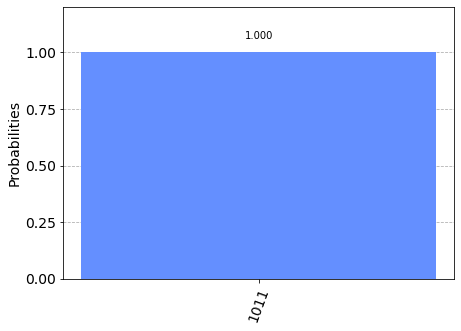

In [7]:
# ローカルのシミュレーターを使用する
aer_sim = Aer.get_backend('aer_simulator')
shots = 1024
qobj = assemble(bv_circuit)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

1.全ての量子レジスタを0に初期化する。 
$$\ket{ψ_0} = \ket{0000}$$
 
 
2.全ての量子レジスタにアダマールゲートを適用する。 
\begin{align*}
 \ket{ψ_1} = \frac{1}{\sqrt{2^4}}\sum_{x\in \{0,1\}^4}\ket{x} \\
\end{align*}
 
 
3.文字列s=1011に対して、オラクル演算を実施する。  

s⋅xは、入力xと文字列sの各ビットの内積のXORをとる（$s⋅x = {s_0⋅x_0}\oplus{s_1⋅x_1}\oplus...\oplus{s_{n-1}⋅x_{n-1}}$）。 
\begin{align*}
 \ket{ψ_2} &= \frac{1}{\sqrt{2^4}}\sum_{x\in \{0,1\}^4}(-1)^{s⋅x}\ket{x} \\
 &= \frac{1}{\sqrt{2^4}}((-1)^{1011⋅0000}\ket{0000} + (-1)^{1011⋅0001}\ket{0001} + (-1)^{1011⋅0010}\ket{0010} + (-1)^{1011⋅0011}\ket{0011} \\
 &\quad + (-1)^{1011⋅0100}\ket{0100} + (-1)^{1011⋅0101}\ket{0101} + (-1)^{1011⋅0110}\ket{0110} + (-1)^{1011⋅0111}\ket{0111} \\
 &\quad + (-1)^{1011⋅1000}\ket{1000} + (-1)^{1011⋅1001}\ket{1001} + (-1)^{1011⋅1010}\ket{1010} + (-1)^{1011⋅1011}\ket{1011} \\
 &\quad + (-1)^{1011⋅1100}\ket{1100} + (-1)^{1011⋅1101}\ket{1101} + (-1)^{1011⋅1110}\ket{1110} + (-1)^{1011⋅1111}\ket{1111}) \\
 &= \frac{1}{\sqrt{2^4}}(\ket{0000} - \ket{0001} - \ket{0010} + \ket{0011} + \ket{0100} - \ket{0101} - \ket{0110} + \ket{0111} \\
 &\quad - \ket{1000} + \ket{1001} + \ket{1010} - \ket{1011} - \ket{1100} + \ket{1101} + \ket{1110} - \ket{1111}) \\
\end{align*}
 
 
4.全ての量子レジスタにアダマールゲートを適用する。  
下記の式を利用して計算する。　
\begin{cases}
 \frac{1}{\sqrt{2}}(\ket{+} - \ket{-}) &= \frac{1}{\sqrt{2}}(\frac{1}{\sqrt{2}}(\ket{0}+\ket{1}) - \frac{1}{\sqrt{2}}(\ket{0}-\ket{1}))  = \frac{1}{\sqrt{2}}\frac{2}{\sqrt{2}}\ket{1} = \ket{1} \\
 \frac{1}{\sqrt{2}}(\ket{+} + \ket{-}) &= \frac{1}{\sqrt{2}}(\frac{1}{\sqrt{2}}(\ket{0}+\ket{1}) + \frac{1}{\sqrt{2}}(\ket{0}-\ket{1}))  = \frac{1}{\sqrt{2}}\frac{2}{\sqrt{2}}\ket{0} = \ket{0} \\
\end{cases}　

\begin{align*}
 \ket{ψ_3} &= \frac{1}{\sqrt{2^4}}((\ket{++++} - \ket{+++-}) - (\ket{++-+} - \ket{++--}) + (\ket{+-++} - \ket{+-+-}) - (\ket{+--+} - \ket{+---}) \\
 &\quad - (\ket{-+++} - \ket{-++-}) + (\ket{-+-+} - \ket{-+--}) - (\ket{--++} - \ket{--+-}) + (\ket{---+} - \ket{----})) \\
 &= \frac{1}{\sqrt{2^4}}\frac{2}{\sqrt{2}}((\ket{+++1} - \ket{++-1}) + (\ket{+-+1} - \ket{+--1}) - (\ket{-++1} - \ket{-+-1}) - (\ket{--+1} - \ket{---1})) \\
 &= \frac{1}{\sqrt{2^4}}\frac{2}{\sqrt{2}}\frac{2}{\sqrt{2}}((\ket{++11} + \ket{+-11}) - (\ket{-+11} + \ket{--11})) \\
 &= \frac{1}{\sqrt{2^4}}\frac{2}{\sqrt{2}}\frac{2}{\sqrt{2}}\frac{2}{\sqrt{2}}(\ket{+011} - \ket{-011}) \\
 &= \frac{1}{\sqrt{2^4}}\frac{2}{\sqrt{2}}\frac{2}{\sqrt{2}}\frac{2}{\sqrt{2}}\frac{2}{\sqrt{2}}\ket{1011} \\
 &= \ket{1011}
\end{align*}

2.上記のベルンシュタイン・ヴァジラニの実装は、秘密のビット文字列s=011の場合のものです。  
秘密の文字列s=1110110101の場合を実装してください。  
結果は期待通りでしたか？説明してみてください。  

In [8]:
from qiskit_textbook.widgets import bv_widget
bv_widget(10, "1110110101", hide_oracle=False)

HTMLMath(value='$$ |0000000000\\rangle = |0000000000\\rangle $$')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\xdb\x00\x00\x02\xae\x08\x06\x00\x00\x00(\xf3i\x1…

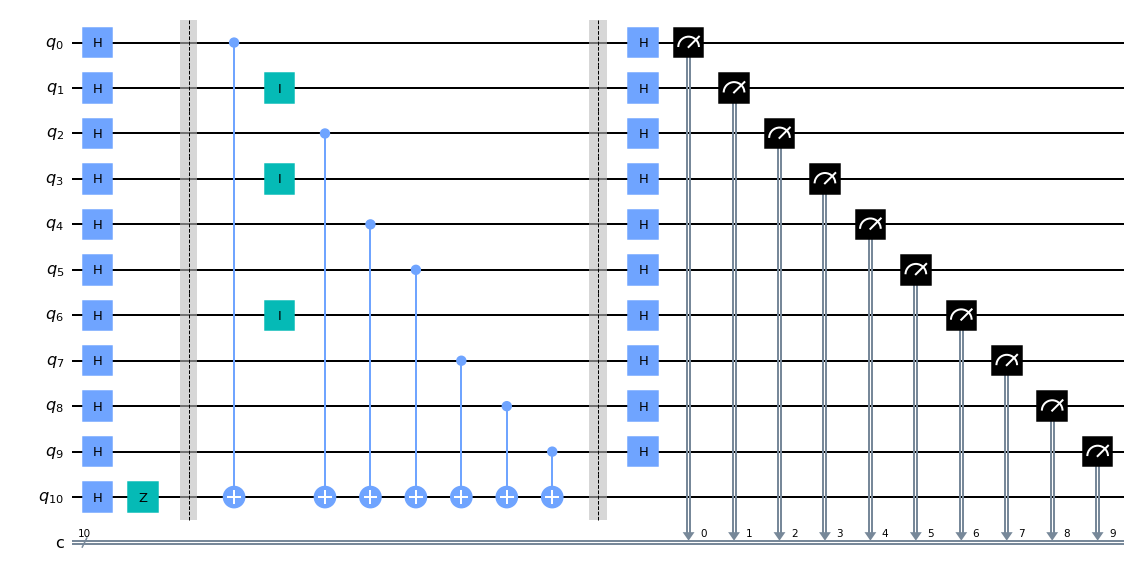

In [9]:
n = 10 # 文字列sの量子ビット数
s = '1110110101'   # 秘密文字列s

# n量子ビットおよび補助量子ビット1つを備えた回路が必要になる
# また、出力を書き込むためにn個の古典ビットが必要になる
bv_circuit = QuantumCircuit(n+1, n)

# 補助量子ビットの状態を|->にする
bv_circuit.h(n)
bv_circuit.z(n)

# アダマールゲートを適用する
for i in range(n):
    bv_circuit.h(i)
    
# バリアを適用する
bv_circuit.barrier()

# オラクルを適用する
s = s[::-1] # Qiskitの量子ビット順序に合わせてsを逆順にする
for q in range(n):
    if s[q] == '0':
        bv_circuit.i(q)
    else:
        bv_circuit.cx(q, n)
        
# バリアを適用する
bv_circuit.barrier()

# アダマールゲートを適用する
for i in range(n):
    bv_circuit.h(i)

# 測定する
for i in range(n):
    bv_circuit.measure(i, i)

bv_circuit.draw()

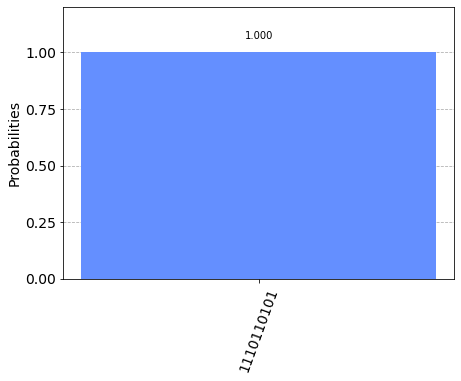

In [10]:
# ローカルのシミュレーターを使用する
aer_sim = Aer.get_backend('aer_simulator')
shots = 1024
qobj = assemble(bv_circuit)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

1.全ての量子レジスタを0に初期化する。  
$$\ket{ψ_0} = \ket{0000000000}$$
 
 
2.全ての量子レジスタにアダマールゲートを適用する。  
\begin{align*}
 \ket{ψ_1} = \frac{1}{\sqrt{2^{10}}}\sum_{x\in \{0,1\}^{10}}\ket{x} \\
\end{align*}
 
 
3.文字列s=1110110101に対して、オラクル演算を実施する。  

s⋅xは、入力xと文字列sの各ビットの内積のXORをとる（$s⋅x = {s_0⋅x_0}\oplus{s_1⋅x_1}\oplus...\oplus{s_{n-1}⋅x_{n-1}}$）。 
\begin{align*}
 \ket{ψ_2} &= \frac{1}{\sqrt{2^{10}}}\sum_{x\in \{0,1\}^{10}}(-1)^{s⋅x}\ket{x} \\
 &= \frac{1}{\sqrt{2^{10}}}\sum_{x\in \{0,1\}^{10}}(-1)^{1110110101⋅x}\ket{x} \\
\end{align*}
  
4.全ての量子レジスタにアダマールゲートを適用する。 
\begin{align*}
 \ket{ψ_3} &= \frac{1}{\sqrt{2^{10}}}\sum_{x\in \{0,1\}^{10}}(-1)^{1110110101⋅x}\ket{x}
 \xrightarrow{H^{\bigotimes10}} \ket{1110110101} \\
\end{align*}